In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

The Hamiltonian for Rabi model is given by (with $\hbar=1$)
$$
H = \frac{\omega_0}{2}\sigma_z+\mathcal{V}\cos\left(\omega t\right)\sigma_x
$$
We shall take a look at the time evolution of the transition probability and atomic inversion. We take $\omega_0=1$ so $\omega$ is specified as a multiple of $\omega_0$. Note that $\mathcal{V}$ needs to be smaller than $\hbar\omega_0$ in order for RWA to hold.

In [9]:
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

omega_0 = 1000
V = 0.1 * omega_0

tlist = np.linspace(0, 25/30, 1000)
g = qt.basis(2, 0)
e = qt.basis(2, 1)
psi_0 = g

def Rabi(t, detuning = 0, RWA = False):
    if RWA:     # This is in the INTERACTION PICTURE
        return [[V/2*sx, np.cos(detuning * t)], [V/2*sy, np.sin(detuning*t)]]
    
    return [omega_0 * sz / 2, [V * sx, np.cos((omega_0 - detuning) * t)]]


In [10]:
def prob(of_what_state, if_given_state):
    return np.array(
        [np.abs(
            of_what_state.overlap(if_given_state[i])
            ) ** 2
         for i in range(len(tlist))
         ]
        )

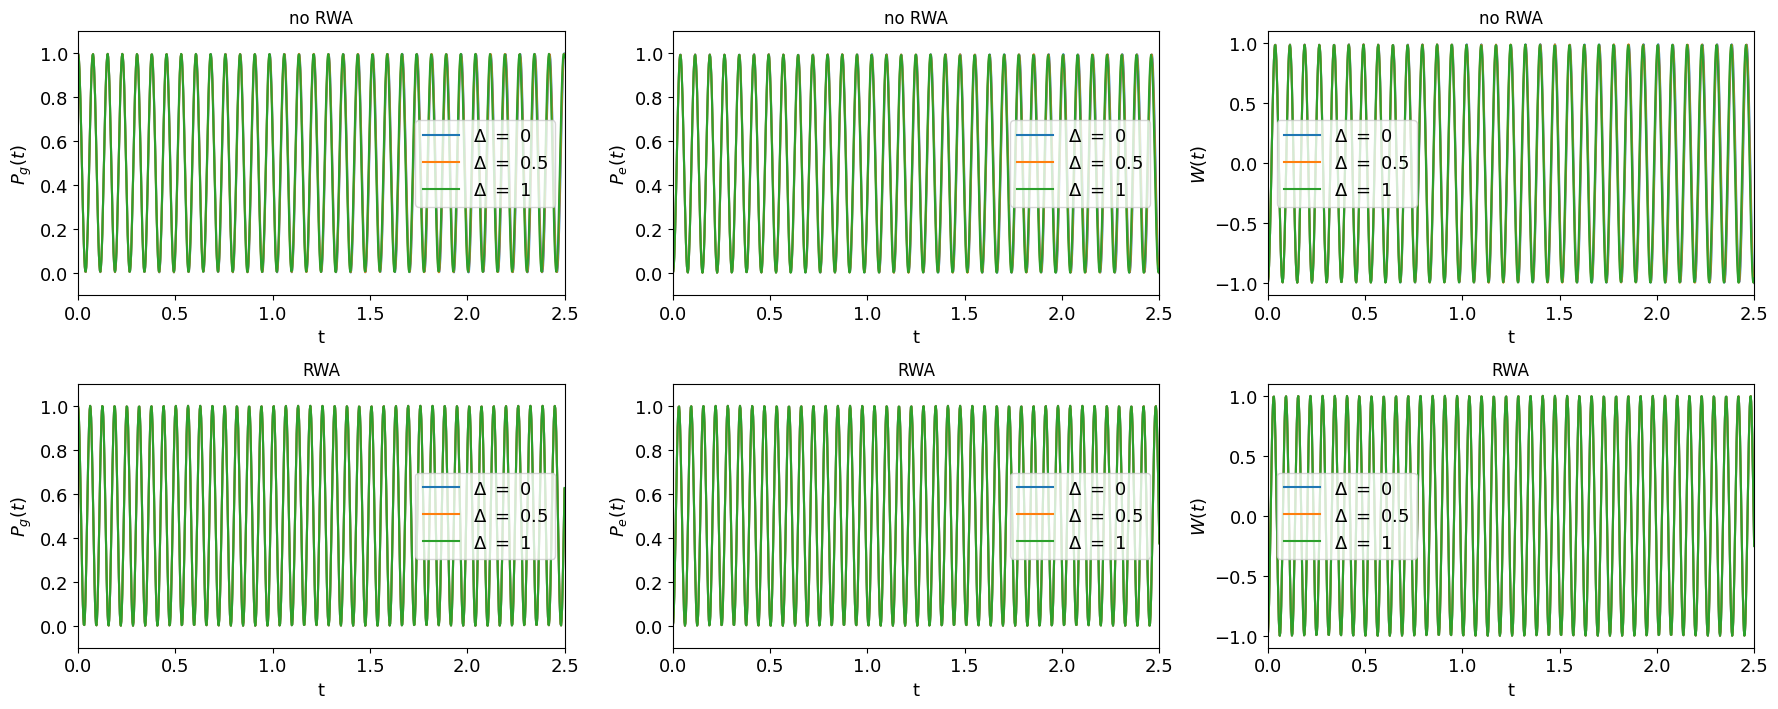

In [11]:
fig, ax = plt.subplots(2,3, figsize = (18, 7.2), squeeze = False)
plt.setp(ax, xlim = (tlist[0], tlist[-1]), ylim = (-0.1, 1.1))

rwa = [False, True]
for i in range(2):
    for detuning in [0, 0.5, 1]:    
        Ham = Rabi(tlist, detuning = detuning, RWA = rwa[i])

        psi_t = qt.sesolve(Ham, psi_0, tlist).states
        
        if rwa[i]: # MOVE BACK TO SCHROEDINGER PICTURE
            for j in range(len(tlist)):
                U = (1j * omega_0 / 2 * sz * tlist[j]).expm()
                psi_t[j] = U.dag() * psi_t[j]

        g_t = prob(g, psi_t)

        e_t = prob(e, psi_t)
        
        w = e_t - g_t
               
        ax[i][0].plot(tlist, g_t, label = r"$\Delta\ =\ %s$" %detuning)
        ax[i][1].plot(tlist, e_t, label = r"$\Delta\ =\ %s$" %detuning)
        ax[i][2].plot(tlist, w, label = r"$\Delta\ =\ %s$" %detuning)
        
title = ["no RWA", "RWA"]
ylabel = [r"$P_g(t)$", r"$P_e(t)$", r"$W(t)$"]
for i in range(2):
    ax[i][2].set_ylim(-1.1, 1.1)
    for j in range(3):
        ax[i][j].set_title(title[i])
        ax[i][j].legend(loc = "best", fontsize = 13)
        ax[i][j].set_xlabel(r"t", fontsize = 13)
        ax[i][j].set_ylabel(ylabel[j], fontsize = 13)
        ax[i][j].tick_params("both", labelsize = 13)
        
plt.tight_layout()
plt.savefig("The Rabi Model.png", dpi = 600)
plt.show()